In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from scipy.sparse import csr_matrix
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

In [5]:
data=pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
print(data.shape)
data.head()

(9134, 24)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
#1 Get the numerical variables from our dataset.

In [8]:
numerical=data.select_dtypes(np.number)
print(numerical.shape)
numerical.head()

(9134, 8)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


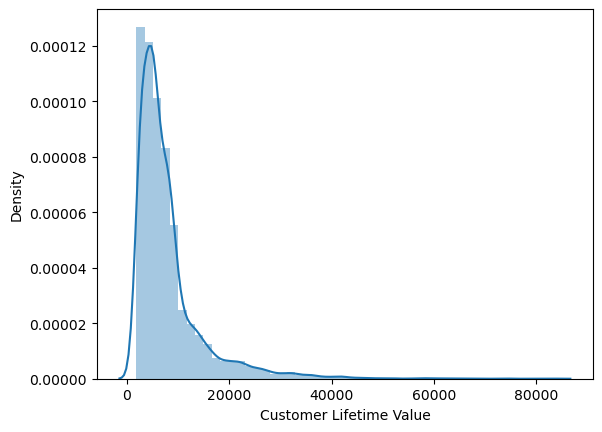

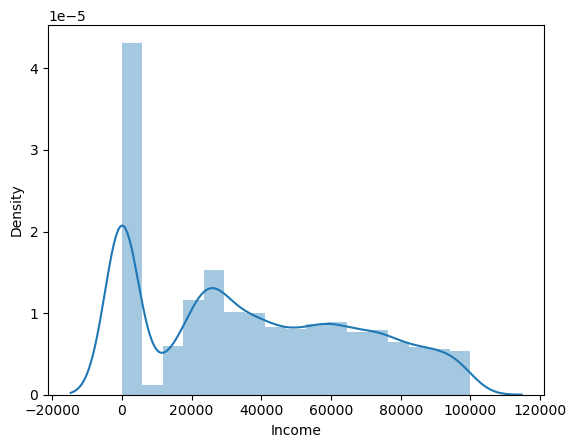

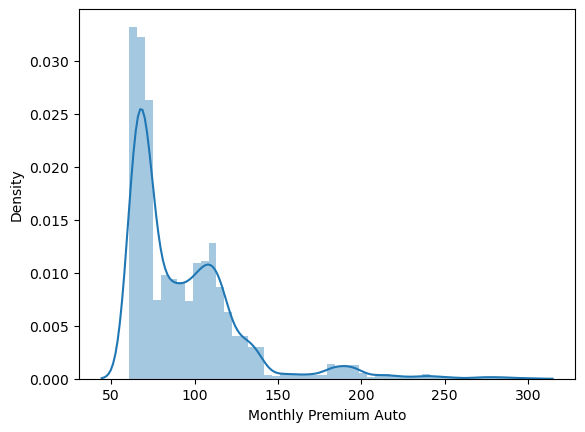

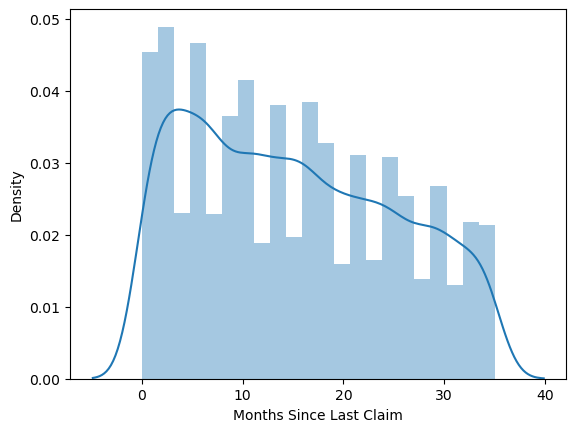

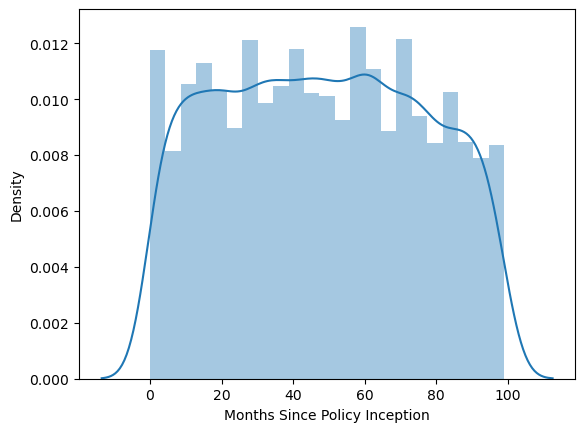

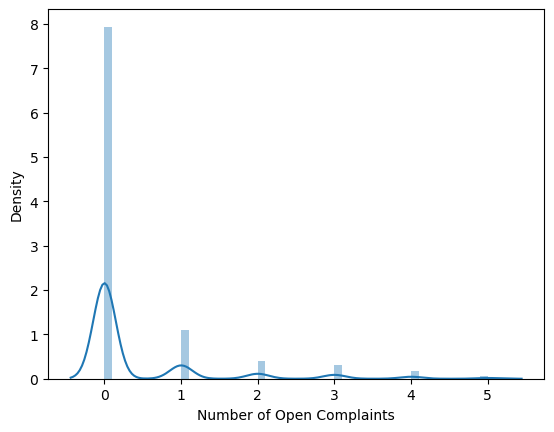

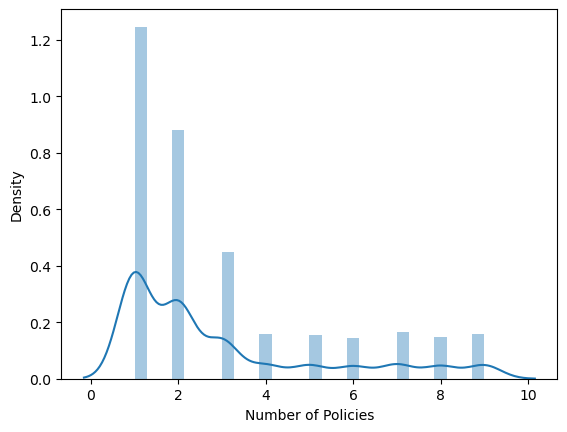

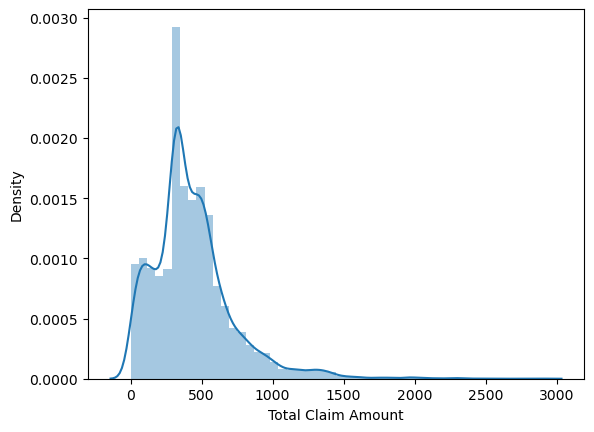

<AxesSubplot:ylabel='Density'>

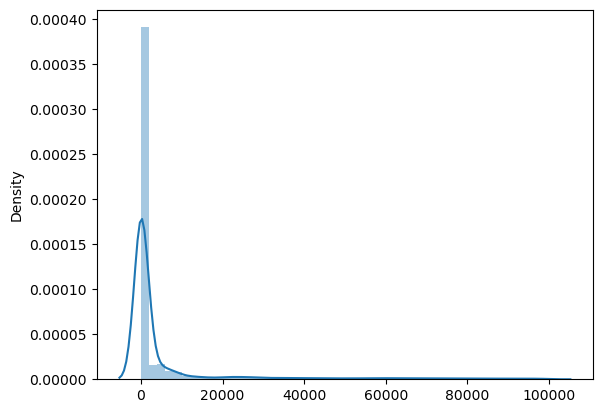

In [24]:
for x in range(len(numerical.columns)):
    sns.distplot(numerical[numerical.columns[x]])
    plt.show()

    
sns.distplot(numerical)

In [28]:
#2 Some look like exponential distributions. The most is wthe last graph where we did the distribution plot of 
#all the numerical dataframe

In [14]:
numerical.columns[1]

'Income'

In [29]:
#3 Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

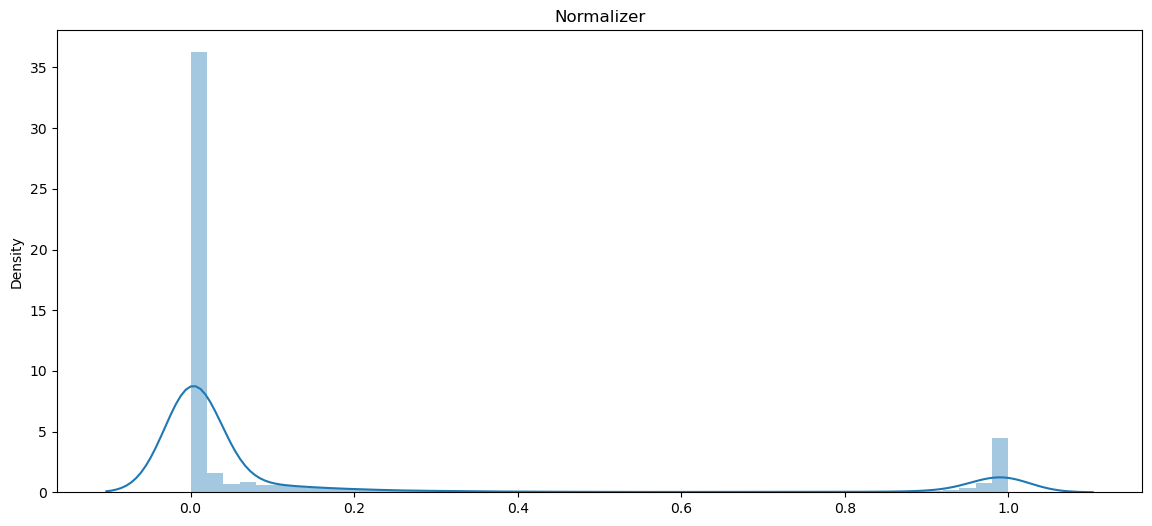

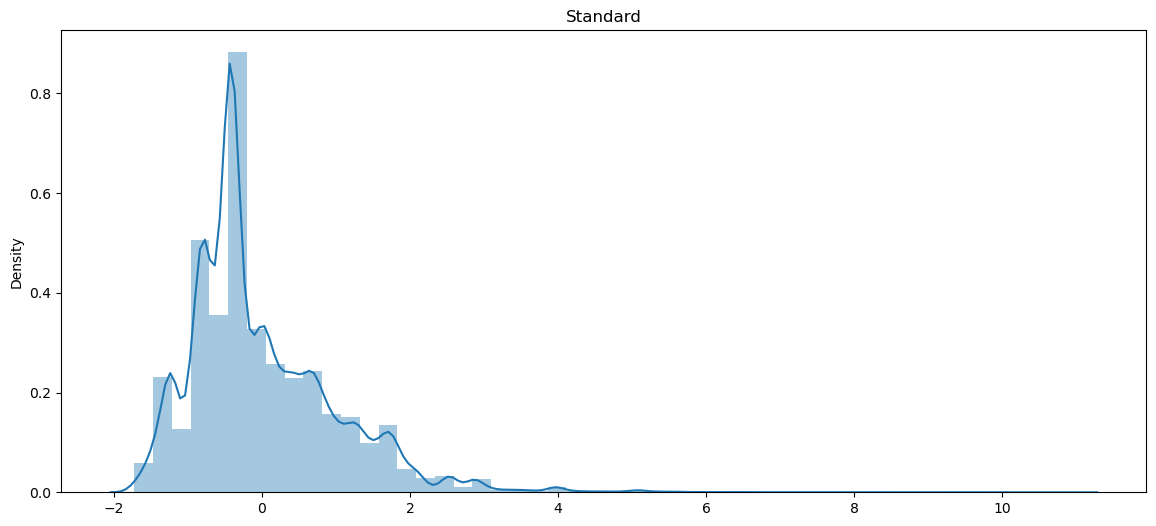

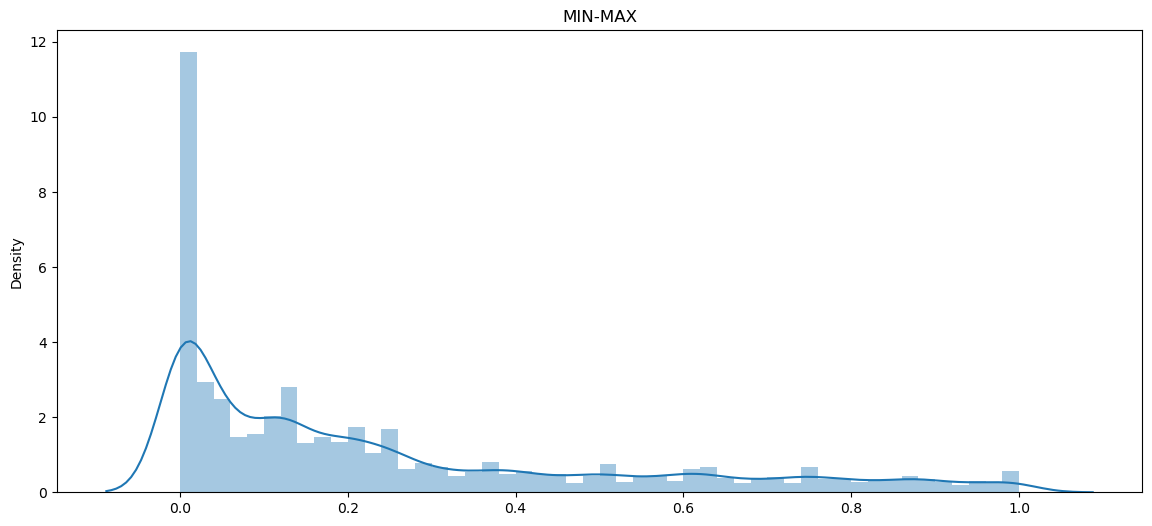

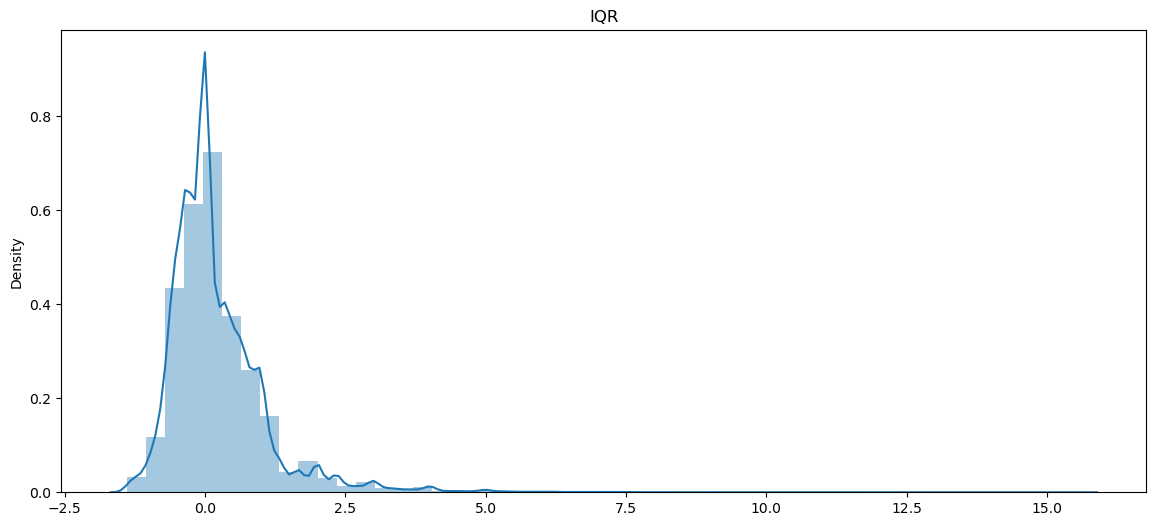

In [47]:
scaled_dfs = [Normalizer().fit_transform(numerical),StandardScaler().fit_transform(numerical), MinMaxScaler().fit_transform(numerical),RobustScaler().fit_transform(numerical)]
names=["Normalizer","Standard","MIN-MAX","IQR"]
for scaled,name in zip(scaled_dfs,names):
    scaled_numerical=pd.DataFrame(scaled,columns=numerical.columns)
    plt.figure(figsize = (14,6))
    sns.distplot(scaled_numerical)
    plt.title(name)
    plt.show()